In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint
import scipy.stats as st
import os.path
from os import path
import json

#country count
output_file = os.path.join("output_data", "country_player_count.csv")

#player details 
output_data_player_details_CA = "output_data/player_details_CA.csv"
output_data_player_details_RU = "output_data/player_details_RU.csv"
output_data_player_details_MX = "output_data/player_details_MX.csv"
output_data_player_details_IE = "output_data/player_details_IE.csv"
output_data_player_details_NZ = "output_data/player_details_NZ.csv"
output_data_player_details_BR = "output_data/player_details_BR.csv"
output_data_player_details_DK = "output_data/player_details_DK.csv"
output_data_player_details_NO = "output_data/player_details_NO.csv"
output_data_player_details_AU = "output_data/player_details_AU.csv"
output_data_player_details_TR = "output_data/player_details_TR.csv"
output_data_player_details_ES = "output_data/player_details_ES.csv"
output_data_player_details_PL = "output_data/player_details_PL.csv"
output_data_player_details_IN = "output_data/player_details_IN.csv"
output_data_player_details_GB = "output_data/player_details_GB.csv"
output_data_player_details_FR = "output_data/player_details_FR.csv"
output_data_player_details_DE = "output_data/player_details_DE.csv"
output_data_player_details_IT = "output_data/player_details_IT.csv"


In [2]:
file = os.path.join("resources", "countries.csv")
countries_df = pd.read_csv(file)
countries_df.head()

country_name =[]
country_codes = []
player_count = []

for index, row in countries_df.iterrows():
    country_code = row["Code"]
    country = row["Country"]
    
    
    filepath = f'output_data/players_{country_code}.csv'
    
    if (path.exists(filepath)):
        players_df =  pd.read_csv(filepath)
              
        country_name.append(row["Country"])
        country_codes.append(row["Code"])
        player_count.append(len(players_df))

    
country_player_count_df = pd.DataFrame({"Country": country_name,
                                       "Country Code": country_codes,
                                        "Player Count": player_count})

count_sorted = country_player_count_df.sort_values("Player Count", ascending=False)
count_sorted_cleaned = count_sorted.loc[count_sorted["Player Count"] >= 1000]

count_sorted_cleaned = count_sorted_cleaned.reset_index(drop=True)
count_sorted_cleaned

,Country,Country Code,Player Count
0,India,IN,276922
1,United Kingdom of Great Britain and Northern I...,GB,192118
2,France,FR,176560
3,Brazil,BR,147040
4,Canada,CA,134687
...,...,...,...
109,Malta,MT,1397
110,Sudan,SD,1369
111,Nicaragua,NI,1317
112,Libya,LY,1180


In [4]:
count_sorted_cleaned.head(10)

,Country,Country Code,Player Count
0,India,IN,276922
1,United Kingdom of Great Britain and Northern I...,GB,192118
2,France,FR,176560
3,Brazil,BR,147040
4,Canada,CA,134687
5,Germany,DE,117887
6,Italy,IT,117604
7,Spain,ES,112180
8,Poland,PL,108111
9,Russian Federation,RU,103656


In [28]:
count_sorted_cleaned.to_csv(output_file, index=True, header=True)

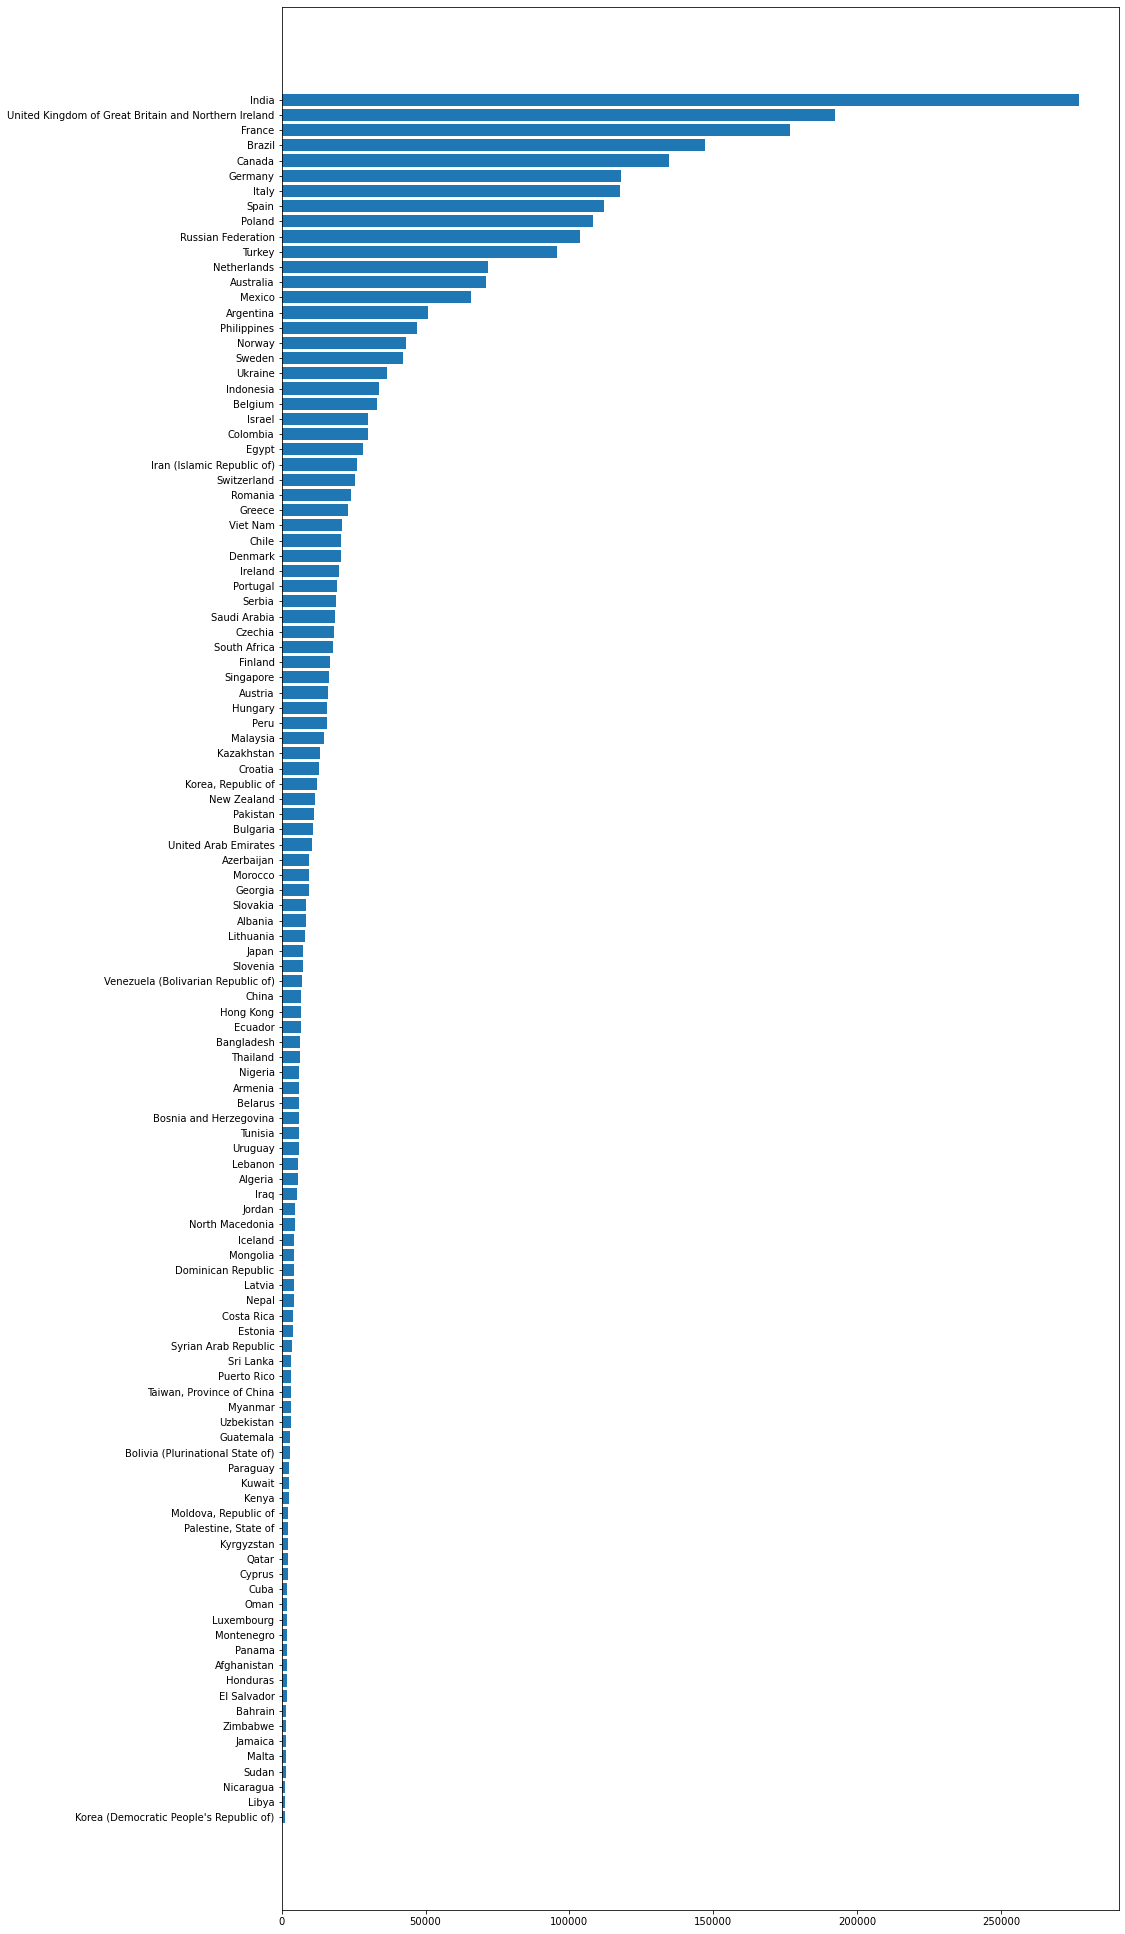

In [3]:
country = count_sorted_cleaned["Country"]
count = count_sorted_cleaned["Player Count"]

fig = plt.figure(figsize=(15,35))
plt.barh(country, count, align='center')
# plt.ylim('British Indian Ocean Territory', "Korea (Democratic People's Republic of)")
plt.gca().invert_yaxis()
plt.show()


In [30]:
# get joined_yearmonth dataframe for player details file
def get_joined_yearmonth_dataframe(output_data_player_details):
    chessplayers_df = pd.read_csv(output_data_player_details)
    joined_dates = []
    joined_yearmonths = []
    joined_months = []
    for index, row in chessplayers_df.iterrows():        
        try:                  
            joined_date = time.strftime('%Y-%m-%d', time.localtime(row["joined"]))
            joined_month = time.strftime('%m', time.localtime(row["joined"]))
            joined_dates.append(joined_date)        
            joined_months.append(joined_month)        
        except: 
            print("unepxected error/skipping country")
    chessplayers_df["joined_date"] = joined_dates
    chessplayers_df["joined_month"] = joined_months
    chessplayers_df["joined_date"] = pd.to_datetime(chessplayers_df["joined_date"]).dt.strftime("%Y-%m-%d")
    chessplayers_df["joined_yearmonth"] = pd.to_datetime(chessplayers_df["joined_date"]).dt.strftime("%Y-%m")
    
    chessplayers_df.sort_values(by=["joined_yearmonth"])
    return chessplayers_df

In [33]:
# CANADA
chessplayers_CA_df = get_joined_yearmonth_dataframe(output_data_player_details_CA)

# RUSSIA
chessplayers_RU_df = get_joined_yearmonth_dataframe(output_data_player_details_RU)

# MEXICO
chessplayers_MX_df = get_joined_yearmonth_dataframe(output_data_player_details_MX)

# IRELAND
chessplayers_IE_df = get_joined_yearmonth_dataframe(output_data_player_details_IE)

# NEW ZEALAND
chessplayers_NZ_df = get_joined_yearmonth_dataframe(output_data_player_details_NZ)

# BRAZIL
chessplayers_BR_df = get_joined_yearmonth_dataframe(output_data_player_details_BR)

# DENMARK
chessplayers_DK_df = get_joined_yearmonth_dataframe(output_data_player_details_DK)

#NORWAY
chessplayers_NO_df = get_joined_yearmonth_dataframe(output_data_player_details_NO)

#AUSTRALIA 
chessplayers_AU_df = get_joined_yearmonth_dataframe(output_data_player_details_AU)

#SPAIN
chessplayers_ES_df = get_joined_yearmonth_dataframe(output_data_player_details_ES)

#TURKEY
chessplayers_TR_df = get_joined_yearmonth_dataframe(output_data_player_details_TR)

#POLAND
chessplayers_PL_df = get_joined_yearmonth_dataframe(output_data_player_details_PL)

#INDIA
chessplayers_IN_df = get_joined_yearmonth_dataframe(output_data_player_details_IN)

#UNITED KINGDON
chessplayers_GB_df = get_joined_yearmonth_dataframe(output_data_player_details_GB)

#FRANCE
chessplayers_FR_df = get_joined_yearmonth_dataframe(output_data_player_details_FR)

#GERMANY
chessplayers_DE_df = get_joined_yearmonth_dataframe(output_data_player_details_DE)

#ITALY
chessplayers_IT_df = get_joined_yearmonth_dataframe(output_data_player_details_IT)




In [34]:
groupby_yearmonth_CA = chessplayers_CA_df.groupby(["joined_yearmonth"])
groupby_yearmonth_RU = chessplayers_RU_df.groupby(["joined_yearmonth"])
groupby_yearmonth_MX = chessplayers_MX_df.groupby(["joined_yearmonth"])
groupby_yearmonth_BR = chessplayers_BR_df.groupby(["joined_yearmonth"])
groupby_yearmonth_DK = chessplayers_DK_df.groupby(["joined_yearmonth"])
groupby_yearmonth_NO = chessplayers_NO_df.groupby(["joined_yearmonth"])
groupby_yearmonth_AU = chessplayers_AU_df.groupby(["joined_yearmonth"])
groupby_yearmonth_ES = chessplayers_ES_df.groupby(["joined_yearmonth"])
groupby_yearmonth_TR = chessplayers_TR_df.groupby(["joined_yearmonth"])
groupby_yearmonth_PL = chessplayers_PL_df.groupby(["joined_yearmonth"])
groupby_yearmonth_IN = chessplayers_IN_df.groupby(["joined_yearmonth"])
groupby_yearmonth_GB = chessplayers_GB_df.groupby(["joined_yearmonth"])
groupby_yearmonth_FR = chessplayers_FR_df.groupby(["joined_yearmonth"])
groupby_yearmonth_DE = chessplayers_DE_df.groupby(["joined_yearmonth"])
groupby_yearmonth_IT = chessplayers_IT_df.groupby(["joined_yearmonth"])



In [37]:
groupby_yearmonth_CA_count_df = groupby_yearmonth_CA["joined_yearmonth"].count()
groupby_yearmonth_RU_count_df = groupby_yearmonth_RU["joined_yearmonth"].count()
groupby_yearmonth_MX_count_df = groupby_yearmonth_MX["joined_yearmonth"].count()
groupby_yearmonth_BR_count_df = groupby_yearmonth_BR["joined_yearmonth"].count()
groupby_yearmonth_DK_count_df = groupby_yearmonth_DK["joined_yearmonth"].count()
groupby_yearmonth_NO_count_df = groupby_yearmonth_NO["joined_yearmonth"].count()
groupby_yearmonth_AU_count_df = groupby_yearmonth_AU["joined_yearmonth"].count()
groupby_yearmonth_ES_count_df = groupby_yearmonth_ES["joined_yearmonth"].count()
groupby_yearmonth_TR_count_df = groupby_yearmonth_TR["joined_yearmonth"].count()
groupby_yearmonth_PL_count_df = groupby_yearmonth_PL["joined_yearmonth"].count()
groupby_yearmonth_IN_count_df = groupby_yearmonth_IN["joined_yearmonth"].count()
groupby_yearmonth_GB_count_df = groupby_yearmonth_GB["joined_yearmonth"].count()
groupby_yearmonth_FR_count_df = groupby_yearmonth_FR["joined_yearmonth"].count()
groupby_yearmonth_DE_count_df = groupby_yearmonth_DE["joined_yearmonth"].count()
groupby_yearmonth_IT_count_df = groupby_yearmonth_IT["joined_yearmonth"].count()

In [31]:
CA_test_df=groupby_yearmonth_CA_count_df
CA_test_df.tail()


joined_yearmonth
2020-09      56
2020-10     134
2020-11     623
2020-12    1023
2021-01     621
Name: joined_yearmonth, dtype: int64

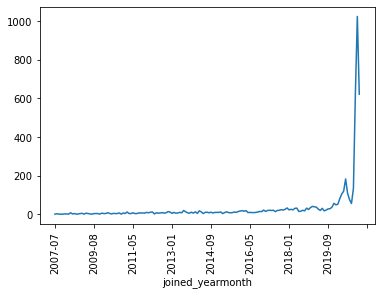

In [32]:
groupby_yearmonth_CA_count_df.plot()

plt.xticks(rotation=90)
plt.show()

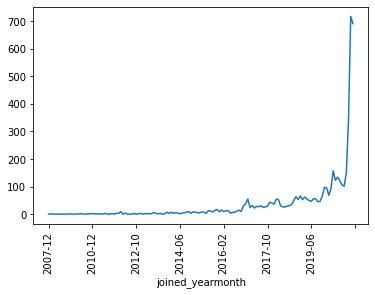

In [33]:
groupby_yearmonth_RU_count_df.plot()

plt.xticks(rotation=90)
plt.show()

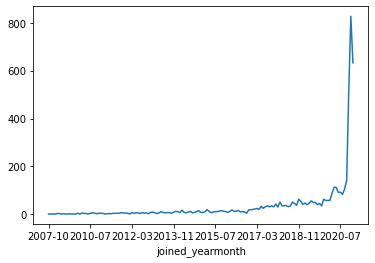

In [34]:
groupby_yearmonth_MX_count_df.plot()

startdate2019 = pd.Timestamp(date.today().year-2, 1, 1)
enddate2019 = pd.Timestamp(date.today().year-1, 1, 1)

In [36]:
startdate2019 = pd.Timestamp(date.today().year-2, 1, 1)
enddate2019 = pd.Timestamp(date.today().year-1, 1, 1)

startdate2020 = pd.Timestamp(date.today().year-1, 1, 1)
enddate2020 = pd.Timestamp(date.today().year-1, 12, 31)

In [46]:
chessplayers_CA_df["joined_date"] = pd.to_datetime(chessplayers_CA_df["joined_date"])

chessplayers_2020_CA_df = chessplayers_CA_df.loc[(chessplayers_CA_df["joined_date"] >= startdate2020) & (chessplayers_CA_df["joined_date"] < enddate2020)]
chessplayers_2020_CA_df

chessplayers_2019_CA_df = chessplayers_CA_df.loc[(chessplayers_CA_df["joined_date"] >= startdate2019) & (chessplayers_CA_df["joined_date"] < enddate2019)]
chessplayers_2019_CA_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
5,5,61337250,uchihasasuke777,NaN,1,CA,NaN,1610308974,1558627376,basic,False,2019-05-23,05,2019-05
26,26,58656772,samiam63636,NaN,0,CA,NaN,1610305741,1552869629,basic,False,2019-03-17,03,2019-03
51,51,61598732,amazingtacothefirst,NaN,2,CA,NaN,1610308444,1559178972,basic,False,2019-05-29,05,2019-05
69,69,57694180,killaseason27,NaN,13,CA,NaN,1610316107,1550878632,basic,False,2019-02-22,02,2019-02
77,77,68807588,theob24,NaN,2,CA,NaN,1610301393,1575390100,basic,False,2019-12-03,12,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,4928,56449102,ugotugot,NaN,0,CA,NaN,1610319545,1548308489,premium,False,2019-01-23,01,2019-01
4935,4935,57081784,patron884,NaN,6,CA,NaN,1610311160,1549590464,basic,False,2019-02-07,02,2019-02
4946,4946,67943794,sirsheepadoodle,NaN,0,CA,NaN,1610255836,1573677350,basic,False,2019-11-13,11,2019-11
4956,4956,65079064,baconbitz80,NaN,8,CA,NaN,1610316886,1567565326,basic,False,2019-09-03,09,2019-09


In [47]:
chessplayers_RU_df["joined_date"] = pd.to_datetime(chessplayers_RU_df["joined_date"])

chessplayers_2020_RU_df = chessplayers_RU_df.loc[(chessplayers_RU_df["joined_date"] >= startdate2020) & (chessplayers_RU_df["joined_date"] < enddate2020)]
chessplayers_2020_RU_df

chessplayers_2019_RU_df = chessplayers_RU_df.loc[(chessplayers_RU_df["joined_date"] >= startdate2019) & (chessplayers_RU_df["joined_date"] < enddate2019)]
chessplayers_2019_RU_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
0,0,58191428,garikges,NaN,0,RU,NaN,1610371227,1551929607,basic,False,2019-03-06,03,2019-03
4,4,66797248,tchevy47,NaN,0,RU,NaN,1610355380,1571335749,basic,False,2019-10-17,10,2019-10
8,8,68008562,antonma2008,NaN,1,RU,NaN,1610295694,1573811250,basic,False,2019-11-15,11,2019-11
12,12,68238356,nikolayzapletin,NaN,0,RU,Самара,1610397087,1574267306,basic,False,2019-11-20,11,2019-11
15,15,64412548,vlados5555,NaN,1,RU,NaN,1610134044,1566055337,premium,False,2019-08-17,08,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4966,68774036,girrra,NaN,2,RU,NaN,1610410617,1575320979,basic,False,2019-12-02,12,2019-12
4968,4968,57058334,vitalycrts,NaN,19,RU,NaN,1610417285,1549551780,premium,False,2019-02-07,02,2019-02
4976,4976,68941484,raccoonlearnschess,NaN,3,RU,NaN,1610408692,1575627592,basic,False,2019-12-06,12,2019-12
4982,4982,68792198,ildar198770,NaN,2,RU,NaN,1610374413,1575363803,basic,False,2019-12-03,12,2019-12


In [48]:
chessplayers_BR_df["joined_date"] = pd.to_datetime(chessplayers_BR_df["joined_date"])

chessplayers_2020_BR_df = chessplayers_BR_df.loc[(chessplayers_BR_df["joined_date"] >= startdate2020) & (chessplayers_BR_df["joined_date"] < enddate2020)]
chessplayers_2020_BR_df

chessplayers_2019_BR_df = chessplayers_BR_df.loc[(chessplayers_BR_df["joined_date"] >= startdate2019) & (chessplayers_BR_df["joined_date"] < enddate2019)]
chessplayers_2019_BR_df


,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
6,6,61942732,georgemarins,NaN,1,BR,NaN,1610373904,1559744832,basic,False,2019-06-05,06,2019-06
8,8,66191048,rss_free,NaN,13,BR,NaN,1610414469,1570024960,basic,False,2019-10-02,10,2019-10
16,16,62122536,moreira743,NaN,1,BR,Mogi das Cruzes - SP,1610142963,1560173749,basic,False,2019-06-10,06,2019-06
23,23,64015424,acacito,NaN,10,BR,São Paulo,1610317238,1565071820,premium,False,2019-08-05,08,2019-08
27,27,63950210,nossila00,NaN,0,BR,Paiçandu - Pr,1610173670,1564892491,basic,False,2019-08-03,08,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,4968,62907144,juniorespe,NaN,1,BR,NaN,1610405583,1562093817,basic,False,2019-07-02,07,2019-07
4973,4973,64678810,rianpatrickk,NaN,2,BR,NaN,1610368901,1566707556,basic,False,2019-08-24,08,2019-08
4982,4982,55403744,pauloberlese,NaN,6,BR,NaN,1610144709,1546379072,basic,False,2019-01-01,01,2019-01
4987,4987,65743217,lhbe7,NaN,6,BR,NaN,1610307851,1569016588,basic,False,2019-09-20,09,2019-09


In [49]:
chessplayers_DK_df["joined_date"] = pd.to_datetime(chessplayers_DK_df["joined_date"])

chessplayers_2020_DK_df = chessplayers_DK_df.loc[(chessplayers_DK_df["joined_date"] >= startdate2020) & (chessplayers_DK_df["joined_date"] < enddate2020)]
chessplayers_2020_DK_df

chessplayers_2019_DK_df = chessplayers_DK_df.loc[(chessplayers_DK_df["joined_date"] >= startdate2019) & (chessplayers_DK_df["joined_date"] < enddate2019)]
chessplayers_2019_DK_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
2,2,62190998,mkors,NaN,4,DK,NaN,1610437583,1560330305,basic,False,2019-06-12,06,2019-06
22,22,68495138,ithaigramse,NaN,12,DK,NaN,1610392061,1574773964,basic,False,2019-11-26,11,2019-11
25,25,57586402,t-cross1958,NaN,0,DK,NaN,1610422943,1550666524,premium,False,2019-02-20,02,2019-02
38,38,67396352,esben987,NaN,1,DK,NaN,1610438051,1572609771,basic,False,2019-11-01,11,2019-11
49,49,65846768,ltronborg,NaN,0,DK,NaN,1610399151,1569264050,basic,False,2019-09-23,09,2019-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,4978,69055512,mrbounceg,NaN,4,DK,NaN,1610414283,1575830427,basic,False,2019-12-08,12,2019-12
4979,4979,63414916,elgormingo,NaN,0,DK,NaN,1610195316,1563465390,basic,False,2019-07-18,07,2019-07
4983,4983,68667946,dude65,NaN,0,DK,NaN,1610213823,1575113281,basic,False,2019-11-30,11,2019-11
4988,4988,66707688,manamejeffakagod,NaN,1,DK,NaN,1610231662,1571151904,basic,False,2019-10-15,10,2019-10


In [50]:
chessplayers_NO_df["joined_date"] = pd.to_datetime(chessplayers_NO_df["joined_date"])

chessplayers_2020_NO_df = chessplayers_NO_df.loc[(chessplayers_NO_df["joined_date"] >= startdate2020) & (chessplayers_NO_df["joined_date"] < enddate2020)]
chessplayers_2020_NO_df

chessplayers_2019_NO_df = chessplayers_NO_df.loc[(chessplayers_NO_df["joined_date"] >= startdate2019) & (chessplayers_NO_df["joined_date"] < enddate2019)]
chessplayers_2019_NO_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
47,47,65928092,nilswik,NaN,1,NO,NaN,1610370061,1569439285,basic,False,2019-09-25,09,2019-09
71,71,56131604,kapteinkulkis,NaN,7,NO,NaN,1610417265,1547728223,basic,False,2019-01-17,01,2019-01
94,94,65128676,christianb1990,NaN,1,NO,NaN,1610395931,1567688524,premium,False,2019-09-05,09,2019-09
122,122,62982230,puffell,NaN,0,NO,NaN,1610310786,1562297205,basic,False,2019-07-04,07,2019-07
135,135,57637636,dag556,NaN,2,NO,NaN,1610287706,1550770537,basic,False,2019-02-21,02,2019-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4963,4963,68538516,bakkabu,NaN,1,NO,NaN,1610376778,1574858699,basic,False,2019-11-27,11,2019-11
4974,4974,68206986,eula56,NaN,0,NO,NaN,1610353301,1574199240,premium,False,2019-11-19,11,2019-11
4976,4976,55772504,northonchess,NaN,23,NO,NaN,1610400867,1547128349,basic,False,2019-01-10,01,2019-01
4980,4980,55526042,ibrafit,NaN,1,NO,NaN,1610405435,1546630389,basic,False,2019-01-04,01,2019-01


In [51]:
chessplayers_AU_df["joined_date"] = pd.to_datetime(chessplayers_AU_df["joined_date"])

chessplayers_2020_AU_df = chessplayers_AU_df.loc[(chessplayers_AU_df["joined_date"] >= startdate2020) & (chessplayers_AU_df["joined_date"] < enddate2020)]
chessplayers_2020_AU_df

chessplayers_2019_AU_df = chessplayers_AU_df.loc[(chessplayers_AU_df["joined_date"] >= startdate2019) & (chessplayers_AU_df["joined_date"] < enddate2019)]
chessplayers_2019_AU_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
7,7,61852954,z0rb,NaN,15,AU,NaN,1610478485,1559537203,premium,False,2019-06-02,06,2019-06
17,17,70142720,dkay4,NaN,0,AU,NaN,1610452145,1577858387,basic,False,2019-12-31,12,2019-12
22,22,61126536,motojez,NaN,1,AU,NaN,1610331705,1558156259,basic,False,2019-05-17,05,2019-05
26,26,70074436,lilblacknazigirl,NaN,2,AU,NaN,1610366924,1577724891,basic,False,2019-12-30,12,2019-12
27,27,56268961,kou23,NaN,0,AU,NaN,1610430594,1547963218,basic,False,2019-01-19,01,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,4935,64433026,andym1998,NaN,1,AU,NaN,1610439225,1566107689,basic,False,2019-08-17,08,2019-08
4943,4943,63022740,whitefang69,NaN,2,AU,NaN,1610222057,1562411671,basic,False,2019-07-06,07,2019-07
4971,4971,60258420,thiruvanathapuram,NaN,0,AU,NaN,1610443122,1556273995,premium,False,2019-04-26,04,2019-04
4982,4982,62256410,ultrapokefire,NaN,0,AU,NaN,1610434920,1560476012,basic,False,2019-06-13,06,2019-06


In [52]:
chessplayers_ES_df["joined_date"] = pd.to_datetime(chessplayers_ES_df["joined_date"])

chessplayers_2020_ES_df = chessplayers_ES_df.loc[(chessplayers_ES_df["joined_date"] >= startdate2020) & (chessplayers_ES_df["joined_date"] < enddate2020)]
chessplayers_2020_ES_df

chessplayers_2019_ES_df = chessplayers_ES_df.loc[(chessplayers_ES_df["joined_date"] >= startdate2019) & (chessplayers_ES_df["joined_date"] < enddate2019)]
chessplayers_2019_ES_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
4,4,56906806,chandelier1089,NaN,2,ES,NaN,1610191179,1549228326,basic,False,2019-02-03,02,2019-02
17,17,66140790,ricardfont,NaN,0,ES,NaN,1610188982,1569915192,premium,False,2019-10-01,10,2019-10
42,42,60257524,mstrwiskers,NaN,0,ES,NaN,1610393292,1556271938,basic,False,2019-04-26,04,2019-04
48,48,68035022,danifield,NaN,4,ES,NaN,1610186555,1573848316,basic,False,2019-11-15,11,2019-11
49,49,57018368,grinder89,NaN,8,ES,NaN,1610357238,1549469348,basic,False,2019-02-06,02,2019-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4935,4935,65570784,jackslyfer,NaN,1,ES,NaN,1610312466,1568651952,basic,False,2019-09-16,09,2019-09
4947,4947,69790222,mvazquezgordillo,NaN,0,ES,NaN,1610373019,1577204800,basic,False,2019-12-24,12,2019-12
4976,4976,66620962,jeusam,NaN,2,ES,NaN,1610393355,1570953771,basic,False,2019-10-13,10,2019-10
4981,4981,69789010,itamar21,NaN,1,ES,NaN,1610402974,1577203065,basic,False,2019-12-24,12,2019-12


In [53]:
chessplayers_TR_df["joined_date"] = pd.to_datetime(chessplayers_TR_df["joined_date"])

chessplayers_2020_TR_df = chessplayers_TR_df.loc[(chessplayers_TR_df["joined_date"] >= startdate2020) & (chessplayers_TR_df["joined_date"] < enddate2020)]
chessplayers_2020_TR_df

chessplayers_2019_TR_df = chessplayers_TR_df.loc[(chessplayers_TR_df["joined_date"] >= startdate2019) & (chessplayers_TR_df["joined_date"] < enddate2019)]
chessplayers_2019_TR_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
2,2,56365918,zuhayrr,NaN,3,TR,ERZURUM,1610481166,1548159259,basic,False,2019-01-22,01,2019-01
57,57,70015002,nilpro,NaN,7,TR,NaN,1610443896,1577618556,premium,False,2019-12-29,12,2019-12
79,79,59977640,frdnktl06,NaN,1,TR,NaN,1610484818,1555618808,basic,False,2019-04-18,04,2019-04
100,100,68237048,numangm,NaN,1,TR,NaN,1610296970,1574265678,basic,False,2019-11-20,11,2019-11
125,125,64185454,devindicken,NaN,0,TR,NaN,1610464835,1565519847,premium,False,2019-08-11,08,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,4960,57582168,hamit4707,NaN,4,TR,NaN,1610483912,1550656436,basic,False,2019-02-20,02,2019-02
4961,4961,57588282,bimdekiicetea,NaN,0,TR,NaN,1610404631,1550670263,basic,False,2019-02-20,02,2019-02
4966,4966,58380168,adem1111,NaN,3,TR,NaN,1610416613,1552314368,basic,False,2019-03-11,03,2019-03
4979,4979,66659770,gunayata,NaN,2,TR,NaN,1610472806,1571046090,basic,False,2019-10-14,10,2019-10


In [54]:
chessplayers_PL_df["joined_date"] = pd.to_datetime(chessplayers_PL_df["joined_date"])

chessplayers_2020_PL_df = chessplayers_PL_df.loc[(chessplayers_PL_df["joined_date"] >= startdate2020) & (chessplayers_PL_df["joined_date"] < enddate2020)]
chessplayers_2020_PL_df

chessplayers_2019_PL_df = chessplayers_PL_df.loc[(chessplayers_PL_df["joined_date"] >= startdate2019) & (chessplayers_PL_df["joined_date"] < enddate2019)]
chessplayers_2019_PL_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
2,2,59929896,burek1988,NaN,0,PL,NaN,1610533640,1555518758,basic,False,2019-04-17,04,2019-04
9,9,57118712,klempel,NaN,1,PL,NaN,1610555092,1549659496,basic,False,2019-02-08,02,2019-02
61,61,64303212,xxxhansthebyczuxxx,NaN,2,PL,NaN,1610444064,1565800946,basic,False,2019-08-14,08,2019-08
67,67,66187354,matikumpel,NaN,0,PL,NaN,1610536922,1570018527,basic,False,2019-10-02,10,2019-10
69,69,65292524,robertdawidziuk,NaN,0,PL,NaN,1610093499,1568010357,basic,False,2019-09-08,09,2019-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4899,4899,59268346,qqb3ek,NaN,1,PL,NaN,1610351081,1554125504,basic,False,2019-04-01,04,2019-04
4901,4901,60970310,petitetriangle,NaN,1,PL,NaN,1610487132,1557831034,basic,False,2019-05-14,05,2019-05
4947,4947,58982738,johnybatony,NaN,4,PL,NaN,1610453751,1553535279,basic,False,2019-03-25,03,2019-03
4977,4977,57895766,ruryn,NaN,2,PL,NaN,1610550893,1551307659,basic,False,2019-02-27,02,2019-02


In [55]:
chessplayers_IN_df["joined_date"] = pd.to_datetime(chessplayers_IN_df["joined_date"])

chessplayers_2020_IN_df = chessplayers_IN_df.loc[(chessplayers_IN_df["joined_date"] >= startdate2020) & (chessplayers_IN_df["joined_date"] < enddate2020)]
chessplayers_2020_IN_df

chessplayers_2019_IN_df = chessplayers_IN_df.loc[(chessplayers_IN_df["joined_date"] >= startdate2019) & (chessplayers_IN_df["joined_date"] < enddate2019)]
chessplayers_2019_IN_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
2,2,60969688,pthiru_503,NaN,0,IN,NaN,1610468560,1557829511,basic,False,2019-05-14,05,2019-05
3,3,56634864,vanshi_a,NaN,0,IN,NaN,1610433483,1548683907,basic,False,2019-01-28,01,2019-01
7,7,65493136,kunalsikand,NaN,7,IN,NaN,1610438061,1568467446,basic,False,2019-09-14,09,2019-09
42,42,59215996,deadpool398,NaN,1,IN,NaN,1610163251,1554000602,basic,False,2019-03-30,03,2019-03
60,60,56474498,alpha_zer000,NaN,383,IN,NaN,1610203271,1548355226,premium,False,2019-01-24,01,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,4944,69598692,karthikey_schaudhary,NaN,34,IN,NaN,1610477973,1576822766,premium,False,2019-12-19,12,2019-12
4951,4951,60292522,djm25,NaN,0,IN,NaN,1610183088,1556345119,basic,False,2019-04-26,04,2019-04
4965,4965,66523600,vrushab07,NaN,5,IN,NaN,1610455266,1570736245,basic,False,2019-10-10,10,2019-10
4972,4972,68359506,atharvasoul,NaN,1,IN,NaN,1610471293,1574487699,basic,False,2019-11-22,11,2019-11


In [56]:
chessplayers_GB_df["joined_date"] = pd.to_datetime(chessplayers_GB_df["joined_date"])

chessplayers_2020_GB_df = chessplayers_GB_df.loc[(chessplayers_GB_df["joined_date"] >= startdate2020) & (chessplayers_GB_df["joined_date"] < enddate2020)]
chessplayers_2020_GB_df

chessplayers_2019_GB_df = chessplayers_GB_df.loc[(chessplayers_GB_df["joined_date"] >= startdate2019) & (chessplayers_GB_df["joined_date"] < enddate2019)]
chessplayers_2019_GB_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
5,5,62338830,philmoore1,NaN,3,GB,NaN,1610469065,1560679638,basic,False,2019-06-16,06,2019-06
8,8,64230704,qrcids,NaN,5,GB,Calne,1610474081,1565632332,premium,False,2019-08-12,08,2019-08
38,38,68731318,dustygum,NaN,0,GB,NaN,1610463267,1575235454,basic,False,2019-12-01,12,2019-12
92,92,63438896,stargazer52,NaN,1,GB,NaN,1610442282,1563530858,basic,False,2019-07-19,07,2019-07
114,114,61161214,craggerb,NaN,0,GB,NaN,1610472904,1558235494,basic,False,2019-05-18,05,2019-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,4940,64416284,best_person_ever,NaN,26,GB,"London,UK",1610116158,1566062629,basic,False,2019-08-17,08,2019-08
4941,4941,69474320,dotgav,NaN,15,GB,NaN,1610494607,1576599687,premium,False,2019-12-17,12,2019-12
4952,4952,56110544,miketyson47,NaN,2,GB,NaN,1610467534,1547676025,premium,False,2019-01-16,01,2019-01
4975,4975,64991058,laddish,NaN,3,GB,NaN,1610467741,1567351660,basic,False,2019-09-01,09,2019-09


In [57]:
chessplayers_FR_df["joined_date"] = pd.to_datetime(chessplayers_FR_df["joined_date"])

chessplayers_2020_FR_df = chessplayers_FR_df.loc[(chessplayers_FR_df["joined_date"] >= startdate2020) & (chessplayers_FR_df["joined_date"] < enddate2020)]
chessplayers_2020_FR_df

chessplayers_2019_FR_df = chessplayers_FR_df.loc[(chessplayers_FR_df["joined_date"] >= startdate2019) & (chessplayers_FR_df["joined_date"] < enddate2019)]
chessplayers_2019_FR_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
5,5,62566826,bartman13,NaN,2,FR,NaN,1610153685,1561211311,basic,False,2019-06-22,06,2019-06
15,15,65365560,alain141,NaN,11,FR,NaN,1610475562,1568183538,premium,False,2019-09-10,09,2019-09
18,18,67662264,etiennec89,NaN,2,FR,NaN,1610462447,1573131405,basic,False,2019-11-07,11,2019-11
25,25,58314514,sharkezz,NaN,2,FR,NaN,1610401894,1552167736,premium,False,2019-03-09,03,2019-03
27,27,66596134,minniejulie,NaN,11,FR,NaN,1610493987,1570896399,basic,False,2019-10-12,10,2019-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4966,60791202,yuugi14,NaN,1,FR,NaN,1610352097,1557425675,basic,False,2019-05-09,05,2019-05
4974,4974,56740246,sebdvvv,NaN,23,FR,NaN,1610316749,1548886235,basic,False,2019-01-30,01,2019-01
4978,4978,67629946,guerito29,NaN,2,FR,NaN,1610446173,1573064592,basic,False,2019-11-06,11,2019-11
4989,4989,60943146,chacharlatant,NaN,4,FR,NaN,1610472023,1557766352,basic,False,2019-05-13,05,2019-05


In [58]:
chessplayers_DE_df["joined_date"] = pd.to_datetime(chessplayers_DE_df["joined_date"])

chessplayers_2020_DE_df = chessplayers_DE_df.loc[(chessplayers_DE_df["joined_date"] >= startdate2020) & (chessplayers_DE_df["joined_date"] < enddate2020)]
chessplayers_2020_DE_df

chessplayers_2019_DE_df = chessplayers_DE_df.loc[(chessplayers_DE_df["joined_date"] >= startdate2019) & (chessplayers_DE_df["joined_date"] < enddate2019)]
chessplayers_2019_DE_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
6,6,68392462,babyyoda13,NaN,2,DE,NaN,1610480248,1574552214,basic,False,2019-11-23,11,2019-11
9,9,64958254,lordschniedel,NaN,0,DE,NaN,1610395801,1567275521,premium,False,2019-08-31,08,2019-08
21,21,57183198,thomasfoc,NaN,9,DE,NaN,1610491144,1549801451,premium,False,2019-02-10,02,2019-02
24,24,68119204,michorot,NaN,1,DE,NaN,1610480954,1574022290,basic,False,2019-11-17,11,2019-11
27,27,55480426,grongoo,NaN,6,DE,NaN,1610377430,1546541200,basic,False,2019-01-03,01,2019-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4941,4941,61547084,shafi1992,NaN,4,DE,NaN,1610461527,1559069372,basic,False,2019-05-28,05,2019-05
4968,4968,64023678,batto2707,NaN,0,DE,NaN,1610103721,1565095681,basic,False,2019-08-06,08,2019-08
4971,4971,64055978,teaage,NaN,8,DE,NaN,1610485992,1565180706,basic,False,2019-08-07,08,2019-08
4979,4979,65028374,smabrain,NaN,5,DE,NaN,1610439961,1567443206,basic,False,2019-09-02,09,2019-09


In [59]:
chessplayers_IT_df["joined_date"] = pd.to_datetime(chessplayers_IT_df["joined_date"])

chessplayers_2020_IT_df = chessplayers_IT_df.loc[(chessplayers_IT_df["joined_date"] >= startdate2020) & (chessplayers_IT_df["joined_date"] < enddate2020)]
chessplayers_2020_IT_df

chessplayers_2019_IT_df = chessplayers_IT_df.loc[(chessplayers_IT_df["joined_date"] >= startdate2019) & (chessplayers_IT_df["joined_date"] < enddate2019)]
chessplayers_2019_IT_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
15,15,56132886,armikkle,NaN,7,IT,NaN,1610494942,1547730777,basic,False,2019-01-17,01,2019-01
22,22,60004274,squared77,NaN,4,IT,NaN,1610462165,1555686747,basic,False,2019-04-19,04,2019-04
24,24,59501024,antoniofrontino,NaN,0,IT,NaN,1610396885,1554592202,basic,False,2019-04-06,04,2019-04
32,32,69604794,bernardeschi0,NaN,7,IT,NaN,1610234850,1576839019,basic,False,2019-12-20,12,2019-12
38,38,58650336,mmelzi,NaN,6,IT,NaN,1610440174,1552855052,basic,False,2019-03-17,03,2019-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4943,4943,58085140,francesco0427,NaN,4,IT,NaN,1610481786,1551715791,basic,False,2019-03-04,03,2019-03
4951,4951,55558708,iftulugnec,NaN,0,IT,NaN,1610455931,1546700680,basic,False,2019-01-05,01,2019-01
4958,4958,63796518,janker84,NaN,0,IT,NaN,1610404181,1564484568,basic,False,2019-07-30,07,2019-07
4962,4962,58331150,contemascetti22,NaN,1,IT,NaN,1610483453,1552209352,basic,False,2019-03-10,03,2019-03


In [60]:
groupby_yearmonth_2020_CA = chessplayers_2020_CA_df.groupby(["joined_month"])
groupby_yearmonth_2019_CA = chessplayers_2019_CA_df.groupby(["joined_month"])

groupby_yearmonth_2020_RU = chessplayers_2020_RU_df.groupby(["joined_month"])
groupby_yearmonth_2019_RU = chessplayers_2019_RU_df.groupby(["joined_month"])

groupby_yearmonth_2020_BR = chessplayers_2020_BR_df.groupby(["joined_month"])
groupby_yearmonth_2019_BR = chessplayers_2019_BR_df.groupby(["joined_month"])

groupby_yearmonth_2020_DK = chessplayers_2020_DK_df.groupby(["joined_month"])
groupby_yearmonth_2019_DK = chessplayers_2019_DK_df.groupby(["joined_month"])

groupby_yearmonth_2020_NO = chessplayers_2020_NO_df.groupby(["joined_month"])
groupby_yearmonth_2019_NO = chessplayers_2019_NO_df.groupby(["joined_month"])

groupby_yearmonth_2020_AU = chessplayers_2020_AU_df.groupby(["joined_month"])
groupby_yearmonth_2019_AU = chessplayers_2019_AU_df.groupby(["joined_month"])

groupby_yearmonth_2020_ES = chessplayers_2020_ES_df.groupby(["joined_month"])
groupby_yearmonth_2019_ES = chessplayers_2019_ES_df.groupby(["joined_month"])

groupby_yearmonth_2020_TR = chessplayers_2020_TR_df.groupby(["joined_month"])
groupby_yearmonth_2019_TR = chessplayers_2019_TR_df.groupby(["joined_month"])

groupby_yearmonth_2020_PL = chessplayers_2020_PL_df.groupby(["joined_month"])
groupby_yearmonth_2019_PL = chessplayers_2019_PL_df.groupby(["joined_month"])

groupby_yearmonth_2020_IN = chessplayers_2020_IN_df.groupby(["joined_month"])
groupby_yearmonth_2019_IN = chessplayers_2019_IN_df.groupby(["joined_month"])

groupby_yearmonth_2020_GB = chessplayers_2020_GB_df.groupby(["joined_month"])
groupby_yearmonth_2019_GB = chessplayers_2019_GB_df.groupby(["joined_month"])

groupby_yearmonth_2020_FR = chessplayers_2020_FR_df.groupby(["joined_month"])
groupby_yearmonth_2019_FR = chessplayers_2019_FR_df.groupby(["joined_month"])

groupby_yearmonth_2020_DE = chessplayers_2020_DE_df.groupby(["joined_month"])
groupby_yearmonth_2019_DE = chessplayers_2019_DE_df.groupby(["joined_month"])

groupby_yearmonth_2020_IT = chessplayers_2020_IT_df.groupby(["joined_month"])
groupby_yearmonth_2019_IT = chessplayers_2019_IT_df.groupby(["joined_month"])


In [61]:
groupby_yearmonth_2020_CA_count_df = groupby_yearmonth_2020_CA["joined_month"].count()
groupby_yearmonth_2019_CA_count_df = groupby_yearmonth_2019_CA["joined_month"].count()

groupby_yearmonth_2020_RU_count_df = groupby_yearmonth_2020_RU["joined_month"].count()
groupby_yearmonth_2019_RU_count_df = groupby_yearmonth_2019_RU["joined_month"].count()

groupby_yearmonth_2020_BR_count_df = groupby_yearmonth_2020_BR["joined_month"].count()
groupby_yearmonth_2019_BR_count_df = groupby_yearmonth_2019_BR["joined_month"].count()

groupby_yearmonth_2020_DK_count_df = groupby_yearmonth_2020_DK["joined_month"].count()
groupby_yearmonth_2019_DK_count_df = groupby_yearmonth_2019_DK["joined_month"].count()

groupby_yearmonth_2020_NO_count_df = groupby_yearmonth_2020_NO["joined_month"].count()
groupby_yearmonth_2019_NO_count_df = groupby_yearmonth_2019_NO["joined_month"].count()

groupby_yearmonth_2020_AU_count_df = groupby_yearmonth_2020_AU["joined_month"].count()
groupby_yearmonth_2019_AU_count_df = groupby_yearmonth_2019_AU["joined_month"].count()

groupby_yearmonth_2020_ES_count_df = groupby_yearmonth_2020_ES["joined_month"].count()
groupby_yearmonth_2019_ES_count_df = groupby_yearmonth_2019_ES["joined_month"].count()

groupby_yearmonth_2020_TR_count_df = groupby_yearmonth_2020_TR["joined_month"].count()
groupby_yearmonth_2019_TR_count_df = groupby_yearmonth_2019_TR["joined_month"].count()

groupby_yearmonth_2020_PL_count_df = groupby_yearmonth_2020_PL["joined_month"].count()
groupby_yearmonth_2019_PL_count_df = groupby_yearmonth_2019_PL["joined_month"].count()

groupby_yearmonth_2020_IN_count_df = groupby_yearmonth_2020_IN["joined_month"].count()
groupby_yearmonth_2019_IN_count_df = groupby_yearmonth_2019_IN["joined_month"].count()

groupby_yearmonth_2020_GB_count_df = groupby_yearmonth_2020_GB["joined_month"].count()
groupby_yearmonth_2019_GB_count_df = groupby_yearmonth_2019_GB["joined_month"].count()

groupby_yearmonth_2020_FR_count_df = groupby_yearmonth_2020_FR["joined_month"].count()
groupby_yearmonth_2019_FR_count_df = groupby_yearmonth_2019_FR["joined_month"].count()

groupby_yearmonth_2020_DE_count_df = groupby_yearmonth_2020_DE["joined_month"].count()
groupby_yearmonth_2019_DE_count_df = groupby_yearmonth_2019_DE["joined_month"].count()

groupby_yearmonth_2020_IT_count_df = groupby_yearmonth_2020_IT["joined_month"].count()
groupby_yearmonth_2019_IT_count_df = groupby_yearmonth_2019_IT["joined_month"].count()



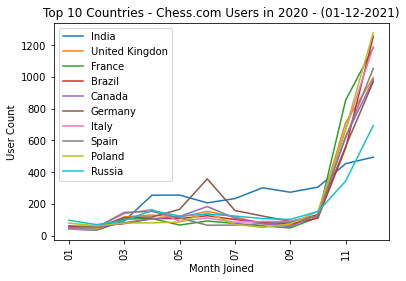

In [66]:

groupby_yearmonth_2020_IN_count_df.plot()
groupby_yearmonth_2020_GB_count_df.plot()
groupby_yearmonth_2020_FR_count_df.plot()
groupby_yearmonth_2020_BR_count_df.plot()
groupby_yearmonth_2020_CA_count_df.plot()
groupby_yearmonth_2020_DE_count_df.plot()
groupby_yearmonth_2020_IT_count_df.plot()
groupby_yearmonth_2020_ES_count_df.plot()
groupby_yearmonth_2020_PL_count_df.plot()
groupby_yearmonth_2020_RU_count_df.plot()


file_created_datetime_CA = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_CA)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Top 10 Countries - Chess.com Users in 2020 - ({file_created_datetime_CA})")
plt.legend(['India', 'United Kingdon', 'France', 'Brazil', 'Canada', 'Germany', 'Italy', 'Spain', 'Poland', 'Russia'])
plt.show()

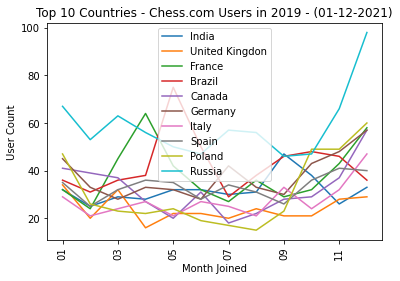

In [71]:
groupby_yearmonth_2019_IN_count_df.plot()
groupby_yearmonth_2019_GB_count_df.plot()
groupby_yearmonth_2019_FR_count_df.plot()
groupby_yearmonth_2019_BR_count_df.plot()
groupby_yearmonth_2019_CA_count_df.plot()
groupby_yearmonth_2019_DE_count_df.plot()
groupby_yearmonth_2019_IT_count_df.plot()
groupby_yearmonth_2019_ES_count_df.plot()
groupby_yearmonth_2019_PL_count_df.plot()
groupby_yearmonth_2019_RU_count_df.plot()


file_created_datetime_CA = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_CA)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Top 10 Countries - Chess.com Users in 2019 - ({file_created_datetime_CA})")
plt.legend(['India', 'United Kingdon', 'France', 'Brazil', 'Canada', 'Germany', 'Italy', 'Spain', 'Poland', 'Russia'])

plt.show()

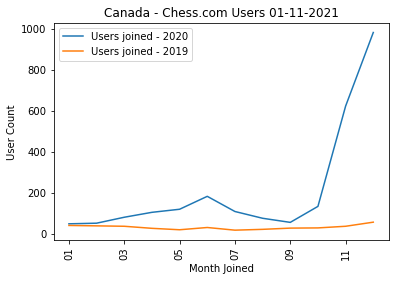

In [42]:
groupby_yearmonth_2020_CA_count_df.plot()
groupby_yearmonth_2019_CA_count_df.plot()

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

file_created_datetime_CA = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_CA)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Canada - Chess.com Users {file_created_datetime_CA}")
plt.legend(['Users joined - 2020', 'Users joined - 2019'])
plt.show()



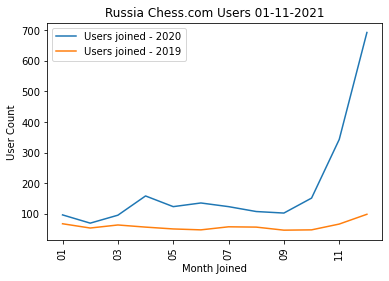

In [43]:
groupby_yearmonth_2020_RU_count_df.plot()
groupby_yearmonth_2019_RU_count_df.plot()

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

file_created_datetime_RU = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_RU)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Russia Chess.com Users {file_created_datetime_RU}")
plt.legend(['Users joined - 2020', 'Users joined - 2019'])
plt.show()



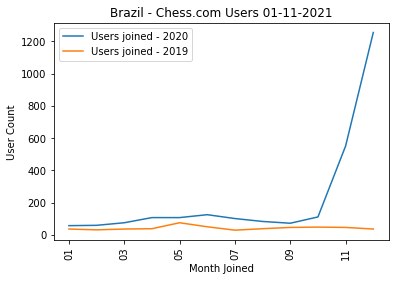

In [44]:
groupby_yearmonth_2020_BR_count_df.plot()
groupby_yearmonth_2019_BR_count_df.plot()

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

file_created_datetime_BR = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_BR)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Brazil - Chess.com Users {file_created_datetime_BR}")
plt.legend(['Users joined - 2020', 'Users joined - 2019'])
plt.show()

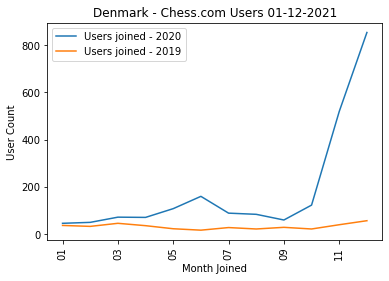

In [45]:
groupby_yearmonth_2020_DK_count_df.plot()
groupby_yearmonth_2019_DK_count_df.plot()

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

file_created_datetime_DK = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_DK)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Denmark - Chess.com Users {file_created_datetime_DK}")
plt.legend(['Users joined - 2020', 'Users joined - 2019'])
plt.show()

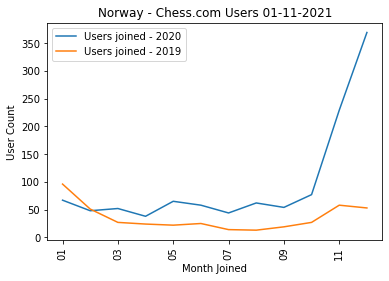

In [82]:
groupby_yearmonth_2020_NO_count_df.plot()
groupby_yearmonth_2019_NO_count_df.plot()

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

file_created_datetime_NO = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_NO)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Norway - Chess.com Users {file_created_datetime_NO}")
plt.legend(['Users joined - 2020', 'Users joined - 2019'])
plt.show()

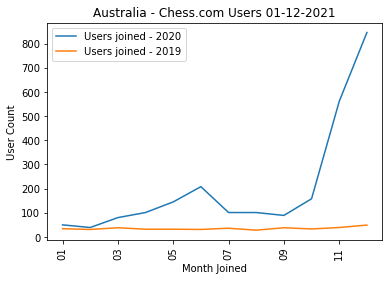

In [84]:
groupby_yearmonth_2020_AU_count_df.plot()
groupby_yearmonth_2019_AU_count_df.plot()

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

file_created_datetime_AU = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_AU)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Australia - Chess.com Users {file_created_datetime_AU}")
plt.legend(['Users joined - 2020', 'Users joined - 2019'])
plt.show()

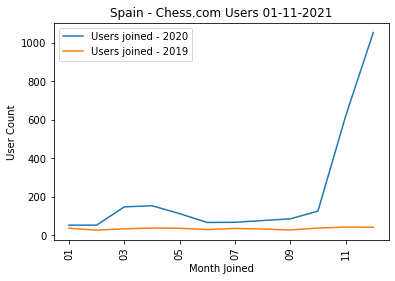

In [102]:
groupby_yearmonth_2020_ES_count_df.plot()
groupby_yearmonth_2019_ES_count_df.plot()

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

file_created_datetime_ES = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_ES)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Spain - Chess.com Users {file_created_datetime_ES}")
plt.legend(['Users joined - 2020', 'Users joined - 2019'])
plt.show()

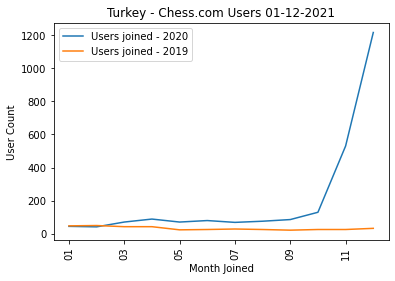

In [103]:
groupby_yearmonth_2020_TR_count_df.plot()
groupby_yearmonth_2019_TR_count_df.plot()

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

file_created_datetime_TR = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_TR)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Turkey - Chess.com Users {file_created_datetime_TR}")
plt.legend(['Users joined - 2020', 'Users joined - 2019'])
plt.show()

In [104]:
#Exploring Locations
chessplayers_location_RU_df = chessplayers_RU_df.loc[chessplayers_RU_df["location"].notnull() == True]
chessplayers_location_CA_df = chessplayers_CA_df.loc[chessplayers_CA_df["location"].notnull() == True]
chessplayers_location_MX_df = chessplayers_MX_df.loc[chessplayers_MX_df["location"].notnull() == True]


chessplayers_location_BR_df = chessplayers_BR_df.loc[chessplayers_BR_df["location"].notnull() == True]
chessplayers_location_DK_df = chessplayers_DK_df.loc[chessplayers_DK_df["location"].notnull() == True]

chessplayers_location_NO_df = chessplayers_NO_df.loc[chessplayers_NO_df["location"].notnull() == True]
chessplayers_location_AU_df = chessplayers_AU_df.loc[chessplayers_AU_df["location"].notnull() == True]
chessplayers_location_ES_df = chessplayers_ES_df.loc[chessplayers_ES_df["location"].notnull() == True]
chessplayers_location_TR_df = chessplayers_TR_df.loc[chessplayers_TR_df["location"].notnull() == True]


In [52]:
chessplayers_location_RU_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
6,6,19029384,sergio_lione,NaN,60,RU,Пермь,1610286285,1411557994,basic,False,2014-09-24,09,2014-09
12,12,68238356,nikolayzapletin,NaN,0,RU,Самара,1610397087,1574267306,basic,False,2019-11-20,11,2019-11
17,17,77412914,maslenkinpavel,NaN,1,RU,город Иваново,1610205327,1587495251,basic,False,2020-04-21,04,2020-04
30,30,106323870,saymon74,NaN,0,RU,г. Анапа,1610381487,1608657028,basic,False,2020-12-22,12,2020-12
37,37,95799250,dogdanov,NaN,13,RU,ulan-ude,1610370585,1604891000,premium,False,2020-11-08,11,2020-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,4967,31082558,dbiryukov,NaN,6,RU,Москва,1610396284,1479830931,basic,False,2016-11-22,11,2016-11
4970,4970,27543726,nick89spb,NaN,1,RU,Санкт-Петербург,1610379435,1459529356,basic,False,2016-04-01,04,2016-04
4983,4983,32716504,miller8888,NaN,5,RU,Белгород,1610386039,1485537003,basic,False,2017-01-27,01,2017-01
4992,4992,82355412,azpavel78,NaN,0,RU,Санкт-Петербург,1610387620,1591950860,basic,False,2020-06-12,06,2020-06


In [53]:
chessplayers_location_CA_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
4,4,24503522,callumgmac,NaN,2,CA,Calgary,1610293656,1444440803,basic,False,2015-10-09,10,2015-10
13,13,7953674,johnnysus,NaN,4,CA,Burlington,1610302685,1340204514,premium,False,2012-06-20,06,2012-06
14,14,24610552,ddddan1,NaN,1,CA,North of Toronto,1610314257,1445031094,premium,False,2015-10-16,10,2015-10
23,23,13282036,tom-wong2285,NaN,14,CA,ontario,1610314953,1377471735,basic,False,2013-08-25,08,2013-08
35,35,73614820,mariomicka,NaN,15,CA,Vancouver,1610307249,1584340692,premium,False,2020-03-15,03,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,4962,13249516,asusintel,NaN,2,CA,BC,1610267932,1377249178,basic,False,2013-08-23,08,2013-08
4966,4966,94517526,shmulprince,NaN,7,CA,Toronto,1610323017,1604117190,premium,False,2020-10-30,10,2020-10
4977,4977,24861684,remib1994,NaN,3,CA,Montréal,1610316269,1446418150,basic,False,2015-11-01,11,2015-11
4987,4987,73199132,myles4833,NaN,10,CA,Peterborough,1610305126,1583640385,premium,False,2020-03-07,03,2020-03


In [54]:
chessplayers_location_MX_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
2,2,92190956,kikequesos,NaN,2,MX,Guadalajara Jalisco,1610408984,1601390156,basic,False,2020-09-29,09,2020-09
11,11,19572042,cvazquez48,NaN,11,MX,"Cuauhtémoc, Distrito Federal, Mexico",1610416425,1415077932,basic,False,2014-11-03,11,2014-11
22,22,95975744,gerasaurius42069,NaN,5,MX,mexico,1610395346,1604980851,premium,False,2020-11-09,11,2020-11
28,28,24398746,heislockote,NaN,4,MX,México,1610415268,1443851671,basic,False,2015-10-02,10,2015-10
34,34,45016248,canessa11,NaN,2,MX,Mich.,1610121720,1522970861,basic,False,2018-04-05,04,2018-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,4938,21552418,orgarcia18,NaN,4,MX,Guadalajara,1610361129,1426566608,basic,False,2015-03-16,03,2015-03
4955,4955,32587532,hectorspg,NaN,1,MX,México,1610098517,1485094392,basic,False,2017-01-22,01,2017-01
4966,4966,101092254,camcruz,NaN,0,MX,Monterrey,1610406188,1606901699,basic,False,2020-12-02,12,2020-12
4977,4977,38818046,solidvee,NaN,20,MX,The HA,1610406218,1505972376,basic,False,2017-09-20,09,2017-09


In [57]:
chessplayers_location_BR_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
13,13,93000618,anserkrey,NaN,3,BR,"Cubatão, SP",1610160578,1602538130,basic,False,2020-10-12,10,2020-10
15,15,109542192,brunaodojet,NaN,1,BR,Itapira-SP,1610377411,1609718286,basic,False,2021-01-03,01,2021-01
16,16,62122536,moreira743,NaN,1,BR,Mogi das Cruzes - SP,1610142963,1560173749,basic,False,2019-06-10,06,2019-06
22,22,479131,zamana,NaN,12,BR,São Paulo,1610426958,1195588514,premium,False,2007-11-20,11,2007-11
23,23,64015424,acacito,NaN,10,BR,São Paulo,1610317238,1565071820,premium,False,2019-08-05,08,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,4960,10323998,toooad,NaN,8,BR,Palmas,1610398079,1357504314,basic,False,2013-01-06,01,2013-01
4965,4965,94662118,anacicho,NaN,1,BR,Brasil,1610109391,1604231853,basic,False,2020-11-01,11,2020-11
4974,4974,32334892,xandassu,NaN,23,BR,Belo Horizonte,1610419445,1484234909,basic,False,2017-01-12,01,2017-01
4976,4976,79533370,viana_chess,NaN,1,BR,Pelotas,1610397324,1589507827,basic,False,2020-05-14,05,2020-05


In [58]:
chessplayers_location_DK_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
7,7,2923799,tsst,NaN,0,DK,Copenhagen,1610374548,1276871898,premium,False,2010-06-18,06,2010-06
11,11,9214220,magnuspaludan,NaN,0,DK,odense,1610291780,1349942740,basic,False,2012-10-11,10,2012-10
27,27,26632158,radunsrb,NaN,3,DK,Berane,1610416019,1455111349,basic,False,2016-02-10,02,2016-02
28,28,22132286,jesperdn,NaN,0,DK,Aarhus,1610406227,1430039648,basic,False,2015-04-26,04,2015-04
33,33,21699794,njm99,NaN,2,DK,slangerup,1610368318,1427450774,premium,False,2015-03-27,03,2015-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,4974,18580346,lykkeskov,NaN,0,DK,Bramming,1610391791,1408572739,basic,False,2014-08-20,08,2014-08
4976,4976,42356768,janjsen,NaN,1,DK,Veksø,1610396792,1516048509,premium,False,2018-01-15,01,2018-01
4977,4977,95438414,donkrantz,NaN,1,DK,Cph,1610438060,1604693019,premium,False,2020-11-06,11,2020-11
4986,4986,32152564,samtjek06,NaN,9,DK,2200,1610200399,1483611560,premium,False,2017-01-05,01,2017-01


In [105]:
chessplayers_location_NO_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
9,9,14989944,einarht,NaN,9,NO,7125 Vanvikan,1610359507,1386846176,basic,False,2013-12-12,12,2013-12
12,12,14556342,cetus65,NaN,16,NO,Auli,1610419716,1385064007,premium,False,2013-11-21,11,2013-11
13,13,19206352,rekekasparov,NaN,17,NO,Bogen,1610405424,1412694934,basic,False,2014-10-07,10,2014-10
15,15,11365974,artsoo,NaN,1,NO,Oslo,1610425506,1364859543,basic,False,2013-04-01,04,2013-04
36,36,25617464,anjumgondal,NaN,2,NO,Oslo,1610398151,1450346701,basic,False,2015-12-17,12,2015-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,4962,14714628,perkisteinberg,NaN,1,NO,Steinberg,1610376265,1385588128,basic,False,2013-11-27,11,2013-11
4979,4979,51977484,bodyen,NaN,2,NO,Oslo,1610392128,1542468188,premium,False,2018-11-17,11,2018-11
4984,4984,19707276,alfno,NaN,2,NO,Oslo,1610350178,1415915472,premium,False,2014-11-13,11,2014-11
4985,4985,14605432,happi73,NaN,26,NO,Asker,1610404705,1385218082,basic,False,2013-11-23,11,2013-11


In [106]:
chessplayers_location_AU_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
31,31,44862536,classicl,NaN,2,AU,Melbourne,1610472014,1522581318,basic,False,2018-04-01,04,2018-04
33,33,3988732,stingers01,NaN,0,AU,Australia,1610484627,1284698822,basic,False,2010-09-16,09,2010-09
42,42,17724208,dan_vdm,NaN,4,AU,"Melbourne, Victoria, Australia",1610454675,1403004057,basic,False,2014-06-17,06,2014-06
49,49,71744518,stephanchessplayer,NaN,4,AU,Melbourne,1610454497,1580888870,premium,False,2020-02-04,02,2020-02
61,61,2931204,handsome_sam,NaN,0,AU,Melbourne,1610438000,1277115614,basic,False,2010-06-21,06,2010-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,4939,75372870,clahav,NaN,0,AU,Sydney,1610171825,1585797604,basic,False,2020-04-01,04,2020-04
4964,4964,2892990,nurt,NaN,1,AU,Melbourne,1610113569,1275888954,basic,False,2010-06-06,06,2010-06
4965,4965,25728445,tehfe92,NaN,2,AU,Sydney,1610160168,1450923133,basic,False,2015-12-23,12,2015-12
4985,4985,109081730,somerandomcow,NaN,1,AU,Perth,1610432319,1609590455,basic,False,2021-01-02,01,2021-01


In [107]:
chessplayers_location_ES_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
12,12,101869718,miguel-moreau,NaN,1,ES,Albacete,1610427151,1607155247,premium,False,2020-12-05,12,2020-12
33,33,38693678,jmsacedo,NaN,15,ES,Torrejón De Ardoz,1610390791,1505579465,basic,False,2017-09-16,09,2017-09
60,60,64158670,ramysan,NaN,2,ES,madrid,1610405637,1565448832,basic,False,2019-08-10,08,2019-08
73,73,1568311,idale,NaN,2,ES,Alava,1610287921,1225309206,basic,False,2008-10-29,10,2008-10
79,79,13001760,ulisesrg,NaN,3,ES,"Bilbao, Spain",1610143555,1375541553,basic,False,2013-08-03,08,2013-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4914,4914,26692574,ariamlebron,NaN,4,ES,Detras del palo,1610400037,1455374254,basic,False,2016-02-13,02,2016-02
4915,4915,94107014,spawnlocke,NaN,4,ES,Sevilla,1610416374,1603807444,premium,False,2020-10-27,10,2020-10
4916,4916,22150974,tastas16,NaN,6,ES,pamplona,1610396538,1430159619,basic,False,2015-04-27,04,2015-04
4961,4961,10688300,robeco,NaN,10,ES,palma,1610407973,1359923483,basic,False,2013-02-03,02,2013-02


In [108]:
chessplayers_location_TR_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
2,2,56365918,zuhayrr,NaN,3,TR,ERZURUM,1610481166,1548159259,basic,False,2019-01-22,01,2019-01
23,23,43771190,ardaunlu2,NaN,1,TR,İstanbul,1610238678,1519757726,basic,False,2018-02-27,02,2018-02
30,30,109394762,tackycobweb,NaN,3,TR,تركيا,1610486905,1609684761,basic,False,2021-01-03,01,2021-01
41,41,28773058,tarkanbinici,NaN,3,TR,türkiye,1610469760,1466779425,basic,False,2016-06-24,06,2016-06
47,47,4743403,okizilkaya,NaN,4,TR,izmir,1610484647,1298223454,basic,False,2011-02-20,02,2011-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4905,4905,59068542,yurdakuloz,NaN,46,TR,kocaeli,1610476819,1553706448,basic,False,2019-03-27,03,2019-03
4921,4921,85533452,sumrak2020,NaN,4,TR,Tasucu,1610456990,1593791253,basic,False,2020-07-03,07,2020-07
4959,4959,108777068,iboreis52,NaN,0,TR,.,1610448904,1609481363,basic,False,2020-12-31,12,2020-12
4967,4967,99414410,lmsure,NaN,3,TR,Ankara,1610484204,1606326742,basic,False,2020-11-25,11,2020-11
